## Analisis de Resultados 


### Configruacion e instalación de librerias necesarias

Para el analisis de la simulación del consumo de Energía Electrica Domestico se utilizaron las siguientes librerias, las cuales nos ayudaran a realizar el calculo de manera rapida y sencilla, y sobre todo poder obtener graficas pertinentes para su evaluación.


In [2]:
#Se intalaron los paquetes estadisticos para realizar la simulación y especialmente para la funcion auto

install.packages('forecast')
install.packages('astsa')
install.packages('stats')

library(readr)
library(forecast)
library(nortest)
library(astsa)
library(stats)

Warning message:
"package 'forecast' is in use and will not be installed"

package 'astsa' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\joaqu\AppData\Local\Temp\Rtmp8E48cb\downloaded_packages


Warning message:
"package 'stats' is not available (for R version 3.6.1)"Warning message:
"package 'stats' is a base package, and should not be updated"

ERROR: Error in library(nortest): there is no package called 'nortest'


In [3]:
library(ggplot2)
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [68]:
install.packages('anytime')
library(anytime)


Warning message:
"package 'anytime' is in use and will not be installed"

In [64]:
install.packages('gridExtra')
install.packages('ggthemes')

library(lubridate) # for working with dates
library(ggplot2)  # for creating graphs
library(scales)   # to access breaks/formatting functions
library(gridExtra)
library(ggthemes)

Warning message:
"package 'gridExtra' is in use and will not be installed"Warning message:
"package 'ggthemes' is in use and will not be installed"

In [111]:
install.packages("fUnitRoots")
library("fUnitRoots")


Warning message:
"package 'fUnitRoots' is in use and will not be installed"

Series: y 
ARIMA(1,0,0) with zero mean 

Coefficients:
         ar1
      0.8289
s.e.  0.0536

sigma^2 estimated as 0.8474:  log likelihood=-133.69
AIC=271.38   AICc=271.51   BIC=276.59

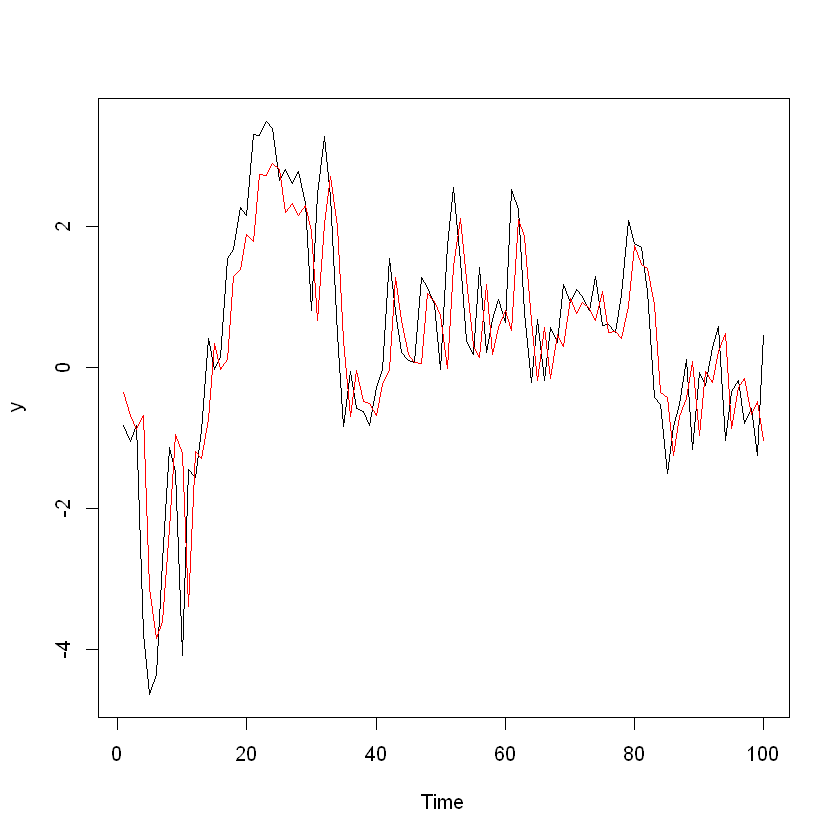

In [147]:
y=arima.sim(list(ar=.9),n=100)

arm=auto.arima(y)
arm
plot(y)
lines(fitted(arm), col='red')


In [110]:
ConsumptionClear <- read_csv("https://raw.githubusercontent.com/jcastanonv/Statistical-Thinking-UCSP/master/ConsumptionClear.csv")
ConsumptionClear$OUTPUT_DATE <- anydate(ConsumptionClear$OUTPUT_DATE)

Parsed with column specification:
cols(
  OUTPUT_DATE = col_character(),
  TYPE = col_character(),
  Total = col_double()
)



Title:
 KPSS Unit Root Test

Test Results:
  NA

Description:
 Thu Aug 20 16:38:09 2020 by user: joaqu


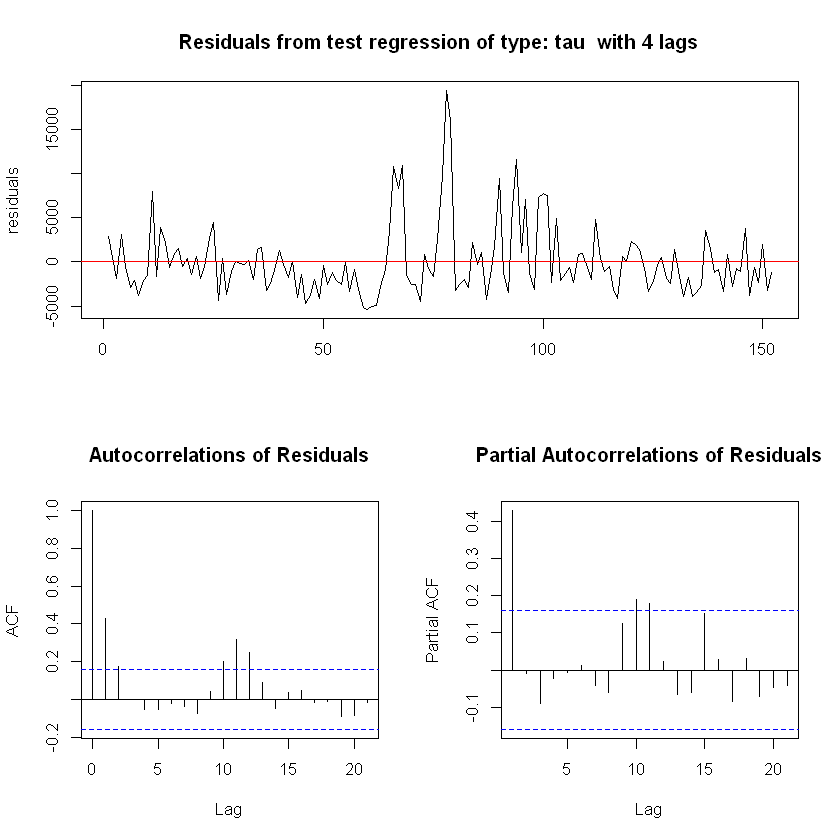

In [125]:
serieA= ts(ConsumptionClear$Total)
urkpssTest(serieA, type = c("tau"), lags = c("short"),use.lag = NULL, doplot = TRUE)


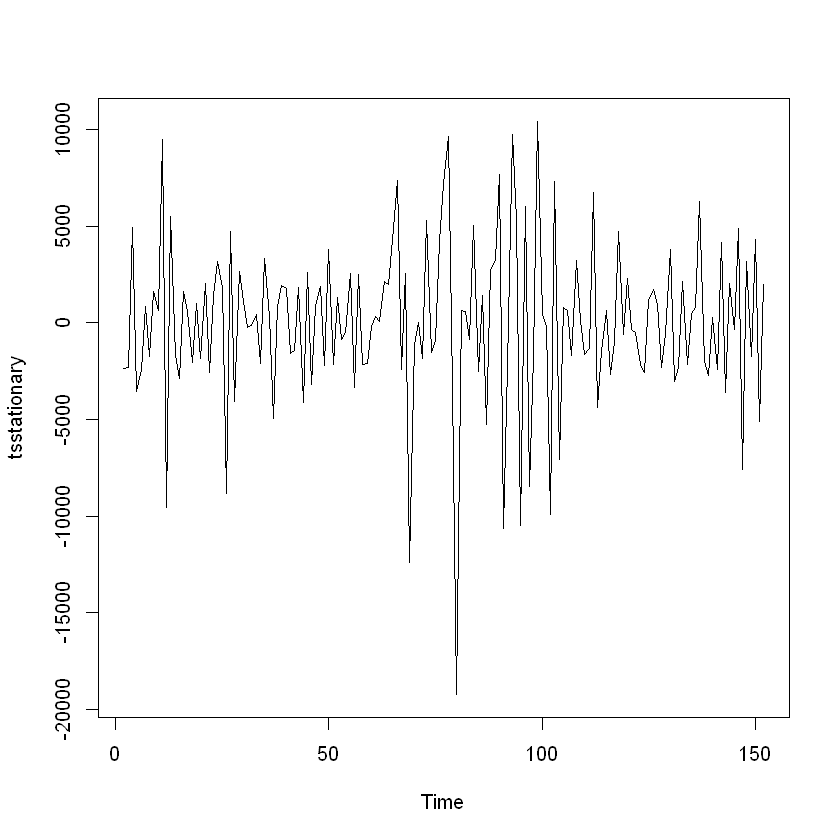

In [123]:
tsstationary<- diff(serieA, differences = 1)
plot(tsstationary)

In [138]:
t1= auto.arima(serieA, trace=TRUE, stepwise = TRUE)
summary(t1)

AR_fitted<- serieA - residuals(t1)



 Fitting models using approximations to speed things up...

 ARIMA(2,0,2) with non-zero mean : 2933.693
 ARIMA(0,0,0) with non-zero mean : 2956.243
 ARIMA(1,0,0) with non-zero mean : 2927.87
 ARIMA(0,0,1) with non-zero mean : 2932.834
 ARIMA(0,0,0) with zero mean     : 3177.21
 ARIMA(2,0,0) with non-zero mean : 2930.93
 ARIMA(1,0,1) with non-zero mean : 2929.97
 ARIMA(2,0,1) with non-zero mean : Inf
 ARIMA(1,0,0) with zero mean     : 2966.187

 Now re-fitting the best model(s) without approximations...

 ARIMA(1,0,0) with non-zero mean : 2927.533

 Best model: ARIMA(1,0,0) with non-zero mean 

Series: serieA 
ARIMA(1,0,0) with non-zero mean 

Coefficients:
         ar1       mean
      0.4274  7301.0806
s.e.  0.0730   508.2506

sigma^2 estimated as 13171721:  log likelihood=-1460.69
AIC=2927.37   AICc=2927.53   BIC=2936.44

Training set error measures:
                    ME     RMSE     MAE       MPE     MAPE      MASE
Training set -9.284956 3605.331 2665.16 -22.35498 43.62673 0.8602

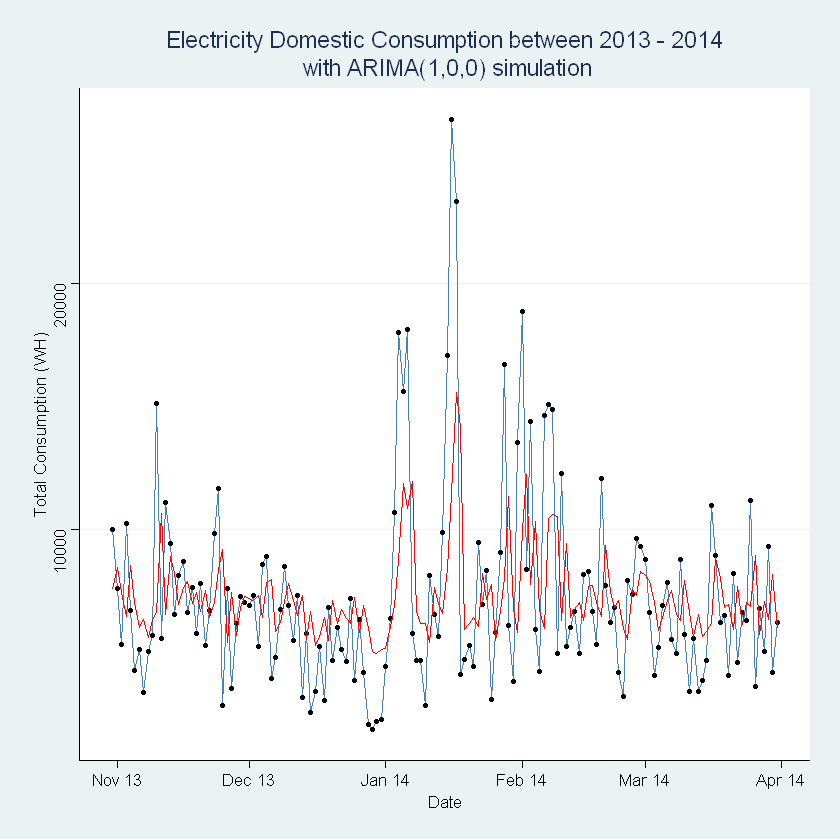

In [141]:

ConsumptionClear$OUTPUT_DATE <- anydate(ConsumptionClear$OUTPUT_DATE)
f <- ggplot(ConsumptionClear, aes(OUTPUT_DATE, Total)) + geom_line(color='steelblue') + geom_point(na.rm=FALSE, size= 1) + ggtitle('Electricity Domestic Consumption between 2013 - 2014\n with ARIMA(1,0,0) simulation') + xlab('Date') + ylab('Total Consumption (WH)') 
fb <- f + (scale_x_date(labels=date_format("%b %y")))
fb <- fb + theme_stata() 
fb <- fb + geom_line(aes(y= fitted(t1)), col='red')
fb
